# Notebook-Centric Approach to Signal Monitoring, Hardware Commissioning, and Operation Analysis

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/logo.png" width=15%>

# 1. Motivation

During Hardware Commissioning (HWC) campaigns all LHC Super Conducting (SC) circuits are tested and analysed by the MP3 team (http://cern.ch/mp3) in a very rigorous and detailed way. However, the period of operation in-between HWC campaigns is long, and due to continuous cycling of the magnets, some circuits might degrade during operation.

Detecting precursors or indications of degraded behavior as early as possible is important to limit potential damage, advice operation team, and plan measures to fix the issues. Since the LHC accelerator is highly complex and demanding in continuous maintenance, maintenance actions must be planned ahead if possible.

After auditing the existing monitoring applications and developing several prototypes we note the following: 
- Up to date, there has been little automated analysis of the electrical signals in CALS and PM. 
- Experts typically use TIMBER to manually analyse data for a few specific cases. 
- There is a heterogeneous collection for (semi)-automatic analysis tools developed in various technologies. These tools are typically dedicated to perform an in-depth analysis of a given system providing a wealth of functionalities.
- The existing tools do not offer functionality for analyzing data in a systematic, automated way (all circuits vs. all times). In addition, they are not opened to alter the code to adjust for a new analysis scenario.
- The logging databases (Post Mortem and NXCALS) have different input signal metadata, time definition, API, and output formats.
- Python as a language and Jupyter notebooks as an interactive development environment have become *de facto* standards in the data analysis.
- The new NXCALS ecosystem introduces a paradigm shift from local computation to cluster computing calling for a new approach in performing system and circuit analysis.


## Scope  

The initial scope of the Signal Monitoring project is to develop the monitoring applications for: 
  1. superconducting magnets and busbars;
  2. circuit and magnet protection systems;
  3. grounding networks;
  4. current leads; 
  5. ...  

The framework, however, has to be expandable to account for other systems of a superconducting circuit (e.g., power converters) as well as other types of hardware (e.g., cryogenics, beam instrumentation, vacuum, etc.).

## New NXCALS Ecosystem

The Signal Monitoring project builds on top of the existing cluster computing and storage infrastructure provided by the IT department. We employ database query API developed by NXCALS and TE-MPE-MS teams. We develop an API for a unified signal query with Post Mortem and NXCALS databases as well as signal processing. Our API fuels the development of signal monitoring application as well as notebooks for Hardware Commisionning and Operation analysis.

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-ecosystem.png" width=85%>

We aim at a coherent approach over all circuits, all systems, and *all* types of analysis. To this end, we use python due to the wealth of libraries for data analysis and modelling. In addition, python allows for programatically interacting with each component in the schematic.
We note that in the new setup not only computation and storage are distributed, but also the areas of competence (hardware experts, logging db teams, computing cluster administrators, analysis experts). Thus, we employ SWAN notebooks as a development a development environment and and a communication platform across teams.

## Requirements  
  The following functional requirements have been guiding the code development and architecture design. In brief, the project should have:
  - a unified API for accessing each database and performing signal processing;
  - an intuitive (graphical) user interface for notebooks to perform signal analysis;
  - a detailed code documentation as well as description of each analysis module; 
  - a database storing analysis results to be used for signal monitoring;
  - a good code quality (naming conventions, tests, continuous integration).

We draw an inspiration from the Netflix ecosystem for the development of data analysis workflows:
  - https://netflixtechblog.com/scheduling-notebooks-348e6c14cfd6
  - https://netflixtechblog.com/notebook-innovation-591ee3221233 

# 2. Use Cases

The Signal Monitoring project aims at covering the following three main use cases:
- Interactive Signal Query and Analysis
- Scheduled Signal Monitoring Applications
- Interactive Analysis of Hardware Commissioning Tests and Events During Operation

## 2.0. Python Notebook Infrastructure
Inspired by a notebook-centric approach at Netflix, we pieced together a similar infrastructure for development of our use cases. In particular, the infrastructure enables 

- view and share of notebooks (SWAN and CERNBox);
- their interactive execution with SWAN and; 
- scheduled execution of parametrized scripts (based on parametrized notebooks) with Apache Airflow. 

The computation is performed on the NXCALS cluster with Spark. The output notebooks, results as csv, as well as html reports are stored on EOS and HDFS.

In order to provide the same version of our API to the users we created a virtual environment (venv) stored on EOS and available for everyone for the sake of reproducibility. CVMFS provides a backbone of python packages, however the API due to its frequent updates does not match this distribution scheme.

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-notebook-infrastructure.png"> 

1. **Jupyter Notebooks** - is an interactive, web-based environment for development and testing of data analysis applications. A notebook is a collection of cells containing code, markdown text, plots, tables, graphics. In fact, this blog post was created as a notebook. The notebook kernel can support various languages. In particular, we use the notebooks in the following manner
    1. we provide a detailed description on what a cell does and call very little code from our API.
    2. we highlight the version of a notebook along with a version of our API for the sake of reproducibility
    3. we profit from the fact that cells share the same namespace enabling reuse of results from a previous cell for the incremental analysis development

  We do not test notebooks as this would unnecessarily load PM and NXCALS databases. Instead, we store the Signal as csv files and test the API which is called in the analysis notebooks.
2. **SWAN** - is a service for a web-based analysis in the cloud. It provides Jupyter notebooks with several kernels (R, python, Octave) tightly integrated with CERN cluster computing infrastructure (Spark) and storage (EOS, HDFS) - https://swan.web.cern.ch
3. **EOS** - is a disk-based, low-latency storage service - http://eos.web.cern.ch
4. **CERNBox** - is a cloude storage solution. It provides a web and desktop client allowing for browsing as well as sharing of an EOS folder - https://cernbox.web.cern.ch
5. **Airflow** - is an open-source scheduler of data analysis jobs. It provides an intuitive web UI and the data analysis jobs are programmed in python - https://airflow.apache.org

## Project Architecture
In order to support our main use cases, the Signal Monitoring project architecture consists of four elements:

1. API for logging db query and signal processing - <a href="https://gitlab.cern.ch/lhcdata/lhc-sm-api">https://gitlab.cern.ch/lhcdata/lhc-sm-api</a>
2. Signal Monitoring notebooks - <a href="https://gitlab.cern.ch/lhcdata/lhc-sm-apps">https://gitlab.cern.ch/lhcdata/lhc-sm-apps</a>
3. HWC and Operation notebooks - <a href="https://gitlab.cern.ch/lhcdata/lhc-sm-hwc">https://gitlab.cern.ch/lhcdata/lhc-sm-hwc</a>
4. Scheduler for execution of HWC notebooks and monitoring applications - <a href="https://gitlab.cern.ch/lhcdata/lhc-sm-scheduler">https://gitlab.cern.ch/lhcdata/lhc-sm-scheduler</a>

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-architecture.png" width=35%>

## 2.1. Signal Query and Processing
The Post Mortem database stores high-resolution signals along with context information in case of events in the LHC (e.g., a beam dump or a fast power abort). The NXCALS performs continuous logging of signals with lower resolution. 
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-pm-nxcals.png" width=50%>
From the user perspective the databases are different in terms of input time, input signal metadata, API, and output format.

|&nbsp;|Post Mortem|NXCALS|
|------|-----------|------|
|Input time|signal query: timestamp (ns)|signal query: time range (ns)|
|&nbsp;|event query: time range (ns)|feature query: time range (ns)|
|&nbsp;|context query: time range (ns)|&nbsp;|
|Input signal metadata|system, source, className, signal|system, device, property, signal|
|API|REST|NXCALS (Spark)|
|Output|json (text)|Spark DataFrame|

Some signals are stored both in Post Mortem and NXCALS. Due to the immanent differences of these databases, a signal, e.g., power converter current has two different metadata.

### 2.1.1. Manual Access with Browsers  
For as much as possible, we suggest to use dedicated browsers to explore the signal hierarchy and visuale plots:
- PM browser: http://post-mortem-paas.web.cern.ch/
- TIMBER - NXCALS browser: http://timber.cern.ch/

### 2.2.2. Programmatic Access with Signal Monitoring API  
There are cases when a general-purpose browser does not allow for a certain type of signal analysis. To this end, each logging database provides an API to access signals programatically.

In order to hide from a user the differences between the logging databases, we develop an API containing, among others, three modules:
- Metadata
- Reference
- pyeDSL

Documentation of the API is available at https://cern.ch/lhc-sm-api

### Metadata

The Metadata module (lhcsmapi.metadata) contains methods to retrieve various signal and circuit names for both Post Mortem and NXCALS.  
In order to avoid storing full names and enable updating signal names based on time, a signal hierarchy is encoded with a dictionary and can be browsed through links in the table below.

|Circuit type|Hyperlink|
|------------|---------|
|RB          |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/RB_METADATA.json|
|RQ          |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/RQ_METADATA.json|
|IT          |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IT_METADATA.json|
|IPQ2        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPQ2_METADATA.json|
|IPQ4        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPQ4_METADATA.json|
|IPQ8        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPQ8_METADATA.json|
|IPD2        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPD2_METADATA.json|
|IPD2_B1B2   |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPD2_B1B2_METADATA.json|
|60A         |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/60A_METADATA.json|
|80-120A     |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/80-120A_METADATA.json|


**SignalMetadata** class stores information about signal and circuit names as well as corresponding metadata.

Some signal names obtained with **SignalMetadata** functions have a wildcard in order to save space and exploit signal naming convention.  
**MappingMetadata** class stores information about circuit topology, e.g., order and names of magnets in a particular circuit.  
There is a collection of csv files containing circuit topology summarised in the table below.

|System type|Hyperlink|
|------------|---------|
|beam mode   |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/beam_mode|
|busbar      |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/busbar|
|magnet      |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/magnet|
|qps_crate   |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/qps_crate|
|blm|https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/blm|

Both signal names and circuit topology change over time and the Metadata module keeps track of these changes.

### Reference

The Reference module (lhcsmapi.reference) stores information about reference signal profiles and feature thresholds. References useful for analysis, so that we can measure deviation of signals.  

|System type|Hyperlink|
|-----------------|---------|
|Energy Extraction|https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/ee|
|Current Leads    |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/leads|
|Power Converter  |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/pc|
|Quench Heaters   |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/qh|

Reference signals and feature thresholds change over time, and the Reference module encodes these challenges.

### pyeDSL - python embedded Domain Specific Language

The pyeDSL language has been designed to hide the differences between logging database APIs as well as provide a set of of the most frequent analysis methods. The following principles were guiding the language development:

1. clear rules of creating code (a sentence) with a fixed order for mandatory methods and a freedom of choice for post-processing of query results
2. clear rules on the extension of the language
3. support to time-dependent metadata
4. support to polymorphic metadata calls, e.g., query of all power converter currents of a given circuit type
5. self-documentation, i.e., query description should be expressive and human-readable so that the code becomes a documentation

As a result, the most repeatable task have a very similar structure. In addition, the use of the language requires little learning and the language is (hopefully) easy to use. In other words, pyeDSL unifies database queries while maintaining immanent differences of each database:
- PM: event, parameter, signal
- (NX)CALS: signal, feature
    
The pyeDSL provides a class for unified database query (**QueryBuilder**) as well as signal processing (**FeatureBuilder**, **AssertionBuilder**, **ResistanceBuilder**).

- Event Query

In order to query a signal stored in PM, a unique unix timestamp in ns resulotion has to be provided. To find the exact timestamp associated with a PM event, the PM REST API provides a method to find events with a given metadata in a specified time interval. We abstract the method and provide with the pyeDSL as

|{Database}|{Time}|{Metadata}|{Query}|{Pre-processing}|
| :--------| :----| :--------| :-----| :--------------|
|with_pm()|with_duration()|with_circuit_type().with_metadata()|signal_query()|filter_source()|
|&nbsp;|&nbsp;|with_query_parameters()|&nbsp;|drop_duplicate_source()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|sort_values()|

In [1]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QDS', source='*') \
    .event_query() \
    .filter_source('RB.A45', 'QDS') \
    .drop_duplicate_source() \
    .sort_values(by='timestamp') \
    .df

source            timestamp
0   B20L5  1426220469490000000
1   C20L5  1426220517099000000
2   A20L5  1426220518111000000
3   A21L5  1426220625989000000
4   B21L5  1426220866111000000
5   C15R4  1426251285710000000
6   B15R4  1426251337746000000
7   A15R4  1426251388740000000
8   B18L5  1426277626359000000
9   A18L5  1426277679837000000
10  C18L5  1426277680495000000
11  A19L5  1426277903448000000

- Signal Query

One of the most frequent types of query is access of signals stored in the logging databases. This functionality is provided by both PM and NXCALS. For PM an exact timestamp has to be provided, while NXCALS takes a time duration. A signal query can be complemented by a set of signal processing functions.

|{Database}|{Time}|{Metadata}|{Query}|{Pre-processing}|
| :--------| :----| :--------| :-----| :--------------|
|with_pm()|with_timestamp()|with_circuit_type().with_metadata()|signal_query()|synchronize_time()|
|with_nxcals()|with_duration()|with_query_parameters()|&nbsp;|convert_time_to_sec()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|median_filter()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|remove_initial_offset()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|normalize()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|standardize()|

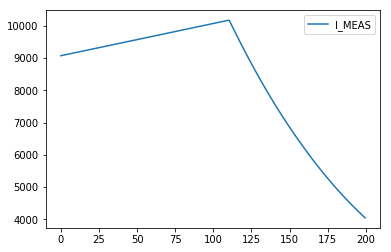

In [3]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='PC', signal='I_MEAS') \
    .signal_query() \
    .convert_index_to_sec() \
    .synchronize_time() \
    .dfs[0]

i_meas_df.plot()

- Feature Query
NXCALS promotes execution of signal analysis methods on the cluster, i.e., where the signals are stored. This brings a potential of parallel execution of signal features on the computing cluster. To this end, we provide a list of feature engineering methods which facilitate the computation on the NXCALS cluster.

|{Database}|{Time}|{Metadata}|{Query}|{Pre-processing}|
| :--------| :----| :--------| :-----| :--------------|
|with_nxcals()|with_duration()|with_circuit_type().with_metadata()|feature_query()|sort_busbar_location()|
|&nbsp;|&nbsp;|with_query_parameters()|&nbsp;|correct_voltage_sign()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|calculate_max_abs()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|sort_values()|
|&nbsp;|&nbsp;|&nbsp;|&nbsp;|convert_into_row()|

We develop PySpark queries on top of native NXCALS API to perform feature computation.
feature_query() method takes the following input arguments:
- list of features - min, max, mean, std, count
- translate function -  to subdivide query into parallelizable subintervals
- decimation and shift - to decimate the signal (take every n-th sample)

This way we generalize the most frequent NXCALS queries and hide the PySpark code from a user.

In [4]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_ab_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2018-05-21 12:22:37', t_end='2018-05-21 13:49:12') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': '*'}) \
    .feature_query(['mean', 'std', 'max', 'min', 'count']).df

u_mag_ab_df.head()

nxcals_variable_name       std      mean  count       max       min
0    DCBQ.27L2.L:U_MAG  0.374921  0.190453  51950  0.965938 -0.006755
1    DCBQ.11R1.L:U_MAG  0.374812  0.195826  51950  0.971429 -0.000552
2   DCBB.A26L2.R:U_MAG  0.374911  0.192975  51950  0.968904 -0.003880
3    DCBQ.10L2.L:U_MAG  0.374921  0.193288  51950  0.968741 -0.003768
4   DCBB.A34L2.R:U_MAG  0.375433  0.191396  51950  0.967327 -0.005010

- Context Query

|{Database}|{Time}|{Metadata}|{Query}|
| :--------| :----| :--------| :-----|
|with_pm()|with_duration()|with_circuit_type().with_metadata()|context_query()|
|&nbsp;|&nbsp;|with_query_parameters()|&nbsp;|

In [5]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder().with_pm() \
    .with_duration(t_start='2015-11-23 07:28:53+01:00', duration=[(2, 's')]) \
    .with_query_parameters(system='BLM', className='BLMLHC', source='HC.BLM.SR6.C') \
    .context_query(contexts=["pmFillNum"]).df

pmFillNum
1448260133517488525       4647

The **QueryBuilder** class provides a generic way for performing all query types. This brings the following benefits:
  + <span style="color: green;">each parameter defined once (validation of input at each stage)</span>
  + <span style="color: green;">single local variable</span>
  + <span style="color: green;">order of operation is fixed</span>
  + <span style="color: green;">support for vector inputs</span>
  + <span style="color: green;">time-dependent metadata</span>
  + <span style="color: green;">pandas dataframe is returned allowing for further processing with the very package</span>

### Applications
The pyeDSL simplified the development of signal monitoring applications as well as notebooks for Hardware Commissioning and Operational analysis. Lately, the project has been also used to other projects at TE-MPE-PE as illustrated by a Venn diagram below.
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-integration.png" width=25%>

The pyeDSL has been already used to query:
- for the STEAM project, the pyeDSL was used to query electrical signals to validate circuit and magnet models (RB, RQ, 600 A, IPQ, IPD), e.g., [1] 
- for the Reliability and Availability studies by querying QPS signals to derive failure rates (RB, RQ, IPQ, IPD), e.g., [2] 
- for the Beam Impact and Machine Protection, the pyeDSL is used to calculate statistics on the BLM signals to analyze beam losses, e.g., [3].  
  A calculation of ~4000 BLM running sums and thresholds statistics was carried out with NXCALS in several seconds.

[1] https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/ipq/PC.ipynb  
[2] https://gitlab.cern.ch/LHCData/lhc-sm-apps/-/blob/master/qps/Exploration_QDS_QH_Events.ipynb  
[3] https://gitlab.cern.ch/LHCData/lhc-sm-apps/-/blob/master/blm/Acquisition_BeamLossMonitor.ipynb  


## 2.2. Signal Monitoring

The execution of signal monitoring applications follows the operational cycle of the machine. Different systems are active in certain periods of operation. Figure below presents an example of triggers synchronized with machine cycle (earth current, voltage feelers, busbar or current lead) and specific events (quench heaters and diode lead resistance).

In general, there are several types of triggering regimes for signal monitoring applications:
- Continuous (always) - analysis of each data point of a signal as soon as it appears. Required for the most critical systems. We do not consider these signals in the first place, as they require a tight integration with the logging system (such as Apache Spark Streams).
- Synchronous - analysis triggered at regular time intervals.
- Synchronous with the machine cycle - analysis executed in a certain part of a machine cycle (injection, ramp, squeeze, plateau, ramp-down).
- Asynchronous - analysis triggered when a PM event occurs (like FPA, QPS).

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-lhc-cycles.png" width=75%>

The development of a monitoring application begins with a **signal exploration** for a given cycle/event in the machine. Since, the logging databases contain a history of Run 1 and 2, the next step is **historical data collection**. The collected data is then separated into three subsets for: (i) training; (ii) validation; (iii) and testing of a **data-driven model**. Once a model is developed it is used for **monitoring**, i.e., on-line signals are compared to model predictions.

### Workflow	
The development of the API has been driven by the need of providing a general-purpose framework for creating signal monitoring applications (signal query, processing, along with visualization and storage of results) and a dedicated workflow. Initially, the focus was put on migrating existing applications that may become incompatible with the introduction of the NXCALS ecosystem (busbar and magnet resistance monitoring) or could be enhanced by the use of machine learning techniques (quench heater discharge analysis). In this light, we began by establishing a process for development of monitoring application. We follow a four-step process in developing monitoring applications as shown in figure below.
&nbsp;

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-signal-monitoring-workflow.png">
&nbsp;

An equally important aspect of developing monitoring application has been the development of a monitor- ing pipeline matching the present computing infrastructure provided by the IT department. The definition of a signal monitoring workflow included selection of a scheduling system, persistent database for storage, and visualization techniques for displaying the results.



### 2.2.1. Exploration - getting the signal features *right*
Creation of a notebook to explore a signal and compute characteristic features.

|&nbsp;|Feature 1|Feature 2|Feature ...|Feature n|
|------|---------|---------|-----------|---------|
|timestamp 1|0.078|980|...|10.4|

The exploration step is executed with SWAN notebooks which allow for many iterations of a given analysis without a need for re-query of signals (variables created in one step are available in the next one). The signal query and processing are performed with appropriate pyeDSL classes.

An output of this step is a notebook performing analysis of a signal for a selected event in the LHC and returning a single row of features.

### 2.2.2. Data Collection - getting the *right* signal features

Execution of a notebook over past operation to collect data for numerical models

|&nbsp;|Feature 1|Feature 2|Feature ...|Feature n|
|------|---------|---------|-----------|---------|
|timestamp 1|0.078|980|...|10.4|
|timestamp 2|0.081|995|...|9.8|
|timestamp ...|...|...|...|...|
|timestamp m|0.08|1000|...|10.1|

Once an exploration step is completed, we convert the notebook from that step into a notebook for long execution in order to collect historical data over Run 1 and 2. The data collection notebook is useful to debug a data collection job prior execution on the cluster. Once the notebook is well-tested, it is converted into a script and executed with Apache Airflow on the NXCALS cluster. An important component of the data collection job is checkpointing, i.e., marking completion of calculation so that in case a job fails after processing a certain number of events in the machine, a restarted job would start from the last processed event.

An output of this step is a well-structured table with historical data characterising a signal/system.

### 2.2.3. Modelling
Once the historical data is gathered, a system modelling is carried out. There is a large variety of modelling methods available to encode the historical data in a compact form, which then can be used for signal monitoring. One grouping of methods divides models into: (i) physical; (ii) and data-driven. The physical models rely on equations describing the physics in order to represent historical data. The data-driven models use historical data and general-purpose equations to encode the system behaviour. 
<img src='https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-modelling.png' width=75%>
For the data-driven models, the left-to-right order can be interpreted in several ways:
- from a clear yes/no answer to vague probabilistic distributions;
- from zero predictive power to a certain predictive potential;
- from fully deterministic algorithms and clear answer, to deterministic algorithms and probabilistic answer, to non-deterministic algorithms and probabilistic answer;
- from low, to moderate, to high computational cost in order to develop and train the model;
- from full trust to result, to high-degree of trust, to low-level of trust;

The modelling step takes as an input historical data stored in HDFS in order to develop a data-driven model in a notebook.

An output of this step are model parameters stored on EOS along with a notebook to verify to model itself.

### 2.2.4. Monitoring
In order to detect anomalies, the monitoring applications perform the following types of comparison of models and on-line signals:
- With historical data we develop digital-twin models and derive trends
- With on-line data we compare behaviour with redundant copies of a system (intra-component) and across circuits of similar topology (cross-population)

<img src='https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-monitoring.png' width=75%>

Monitoring applications are developed as parametrized scripts incorporating the data-driven model and on-line signal. Once an application is completed it is converted into a parameterized script and executed with Airflow. Airflow provides an intuitive web UI enabling experts to modify the monitoring parameters. In case the monitoring application detects an anomaly, an e-mail notification is sent to the expert teams.

### Applications
- Quench Heater Monitoring

Quench heater monitoring is based on extraction of characteristic signal features and their comparison to the reference discharge stored in the Reference module.

<img src='https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-quench-heater.png' width=75%>
Calculation of a row representing a discharge is performed in two steps: 

1. query of voltage signal 
2. extraction of signal features (feature engineering)

In [6]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.FeatureBuilder import FeatureBuilder

timestamp = 1544622149599000000

u_hds_dfs = QueryBuilder().with_pm() \
    .with_timestamp(timestamp) \
    .with_circuit_type('RQ') \
    .with_metadata(circuit_name='RQD.A12', system='QH', signal='U_HDS', source='16L2', wildcard={'CELL': '16L2'}) \
    .signal_query() \
    .synchronize_time(timestamp) \
    .convert_index_to_sec().dfs

FeatureBuilder().with_signal(u_hds_dfs) \
    .calculate_features(features=['first', 'last20mean', 'tau_charge'], index=timestamp)

16L2:U_HDS_1:first  16L2:U_HDS_1:last20mean  \
1544622149599000000            880.4621                 5.575086   

                     16L2:U_HDS_1:tau_charge  16L2:U_HDS_2:first  \
1544622149599000000                  0.07779            872.8354   

                     16L2:U_HDS_2:last20mean  16L2:U_HDS_2:tau_charge  
1544622149599000000                 6.734703                 0.076704

For Post Mortem the computation is carried out locally. **FeatureBuilder** provides a clear path for adding more features by simply expanding the list of features.

- Busbar Resistance Monitoring

Monitoring of busbar involves calculation of 1248 (RB) and 400 (RQ) resistances. The resistance is calculated from a linear fit of voltage and current at plateaus.

<img src='https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-busbar.png' width=75%>

The calculation of the busbar resistance requires three steps:

1. feature query (mean and std) of NXCALS for power converter current for all circuits of a given type (e.g. RB) with **QueryBuilder**
2. feature query (mean and std) of NXCALS for all busbar voltages with **QueryBuilder**
3. calculation of busbar resistance with **ResistanceBuilder**

Note that the feature query takes as input arguments the list of features (mean and std) and a translate function. The goal of the translate function is to subdivide a single query into a partition composed of three elements: (i) injection current; (ii) ramp-up current; (iii) stable beam current. This allows parallel execution of the query. The resistance calculation takes into consideration the injection and stable beam current, i.e., disregarding the inductive voltage.

In [15]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.ResistanceBuilder import ResistanceBuilder

t_start_inj = 1526898157236000000
t_end_inj = 1526899957236000000
t_start_sb = 1526901552338000000
t_end_sb = 1526903352338000000 

def translate(timestamp):
        if (timestamp >= t_start_inj) & (timestamp <= t_end_inj):
            return 1
        elif (timestamp >= t_start_sb) & (timestamp <= t_end_sb):
            return 2
        else:
            return -1

translate_udf = udf(translate, IntegerType())

i_meas_feature_df = QueryBuilder() \
    .with_nxcals(spark) \
    .with_duration(t_start=t_start_inj, t_end=t_end_sb) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS') \
    .feature_query(['mean', 'std'], function=translate_udf).sort_values(by='class').df

u_res_feature_df = QueryBuilder() \
    .with_nxcals(spark) \
    .with_duration(t_start=t_start_inj, t_end=t_end_sb) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='BUSBAR', signal='U_RES', wildcard={'BUSBAR': '*'}) \
    .feature_query(['mean', 'std'], function=translate_udf).sort_busbar_location('RB', circuit_name='*').df

ResistanceBuilder().with_busbar_voltage(u_res_feature_df).with_busbar_current(i_meas_feature_df) \
    .calculate_mean_resistance('RB').convert_to_row(index=t_start_inj)

DCBB.8L2.R_mean_inj  DCBB.8L2.R_std_inj  \
1526898157236000000             0.000064            0.000043   

                     DCBB.8L2.R_mean_sb  DCBB.8L2.R_std_sb  DCBB.8L2.R_R_RES  \
1526898157236000000            0.000076           0.000022      1.163497e-09   

                     DCBB.9L2.R_mean_inj  DCBB.9L2.R_std_inj  \
1526898157236000000            -0.000022            0.000047   

                     DCBB.9L2.R_mean_sb  DCBB.9L2.R_std_sb  DCBB.9L2.R_R_RES  \
1526898157236000000           -0.000014           0.000046      7.771472e-10   

                           ...         DCBQ.8L2.L_mean_inj  \
1526898157236000000        ...                    0.000046   

                     DCBQ.8L2.L_std_inj  DCBQ.8L2.L_mean_sb  \
1526898157236000000            0.000027            0.000037   

                     DCBQ.8L2.L_std_sb  DCBQ.8L2.L_R_RES  DCBD.7L2.L_mean_inj  \
1526898157236000000           0.000026      8.714175e-10             0.000127   

                     DCBD.7L2.L_std_inj  DCBD.7L2.L_mean_sb  \
1526898157236000000            0.000057            0.000109   

                     DCBD.7L2.L_std_sb  DCBD.7L2.L_R_RES  
1526898157236000000           0.000028      1.759216e-09  

[1 rows x 780 columns]

NXCALS cluster computation of **1248** busbar resistances takes approximately as much time as query and local processing of **8** power converter currents.

## 2.3. Hardware Commissioning and Operation Analytics

Although, as the project name indicates, our primary goal is the development of signal monitoring applications, we realized that the analysis modules developed so far can be pieced together into HWC test and operation analysis notebooks.

Even though, we develop the analyses system by system, they were developed in a general way to account for all circuits in which the system was present. Thus, by taking a perpendicular view of the analysis table, a circuit analysis for this stance was possible.

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-monitoring-to-hwc.png" width=75%>

Notebooks are suited for HWC tests and operational analysis for a number of reasons: (i) can be adjusted on-the-fly for new requirements while performing a test; (ii) can immediately generate a report for storage and distribution among a team of domain experts; (iii) provide a sequential template for testing of each system in a certain order.

### Workflow
The HWC and Opearation analysis notebooks can be executed in an interactive and  scheduled manner. The interactive one is carried out by executing an interactive notebook with SWAN. The scheduled execution is a new use case for the project and we still investigate a proper way of doing that.

The execution workflow consists of four steps: 

1. finding an event of interest
  1. start time and end time of an HWC test
  2. timestamp of an FGC Port Mortem event
2. executing analysis cells on the cluster
3. storing output files on EOS:
  1. output html report
  2. output html report as well as csv files with main analysis results

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-hwc-workflow.png" width=40%>

### Signal Assertions

Hardware Commissioning procedures define acceptance criteria for certain signals to be verified prior to the restart of the LHC.
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-signal-assertion.png" width=75%>
**AssertionBuilder** class performs different types of signal assertions.

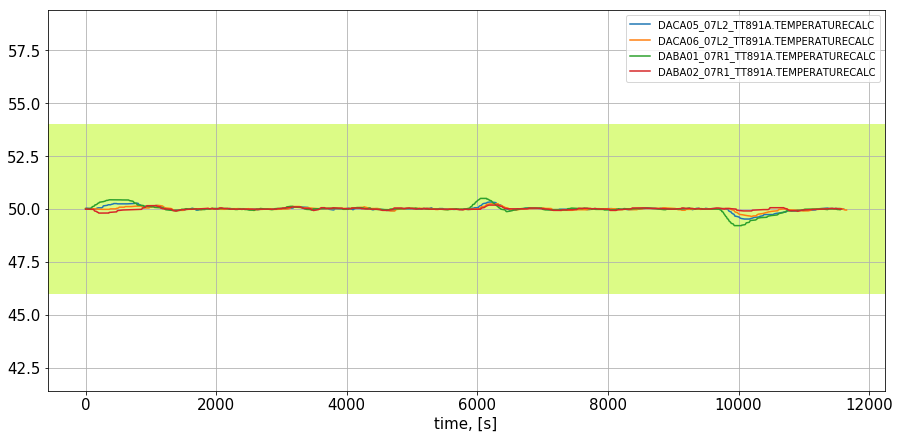

In [11]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.AssertionBuilder import AssertionBuilder

tt891a_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2014-12-13 09:12:41+01:00', t_end='2014-12-13 12:27:11+01:00') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system=['LEADS_EVEN', 'LEADS_ODD'], signal='TT891A') \
    .signal_query() \
    .synchronize_time().convert_index_to_sec().filter_median().dfs

AssertionBuilder().with_signal(tt891a_dfs).has_min_max_value(value_min=46, value_max=54)

### Applications
So far we developed notebooks covering all HWC tests and operational analysis of high-current superconducting circuits:
1. RB - Main Dipole Circuit
<img src = "https://gitlab.cern.ch/LHCData/lhc-sm-hwc/raw/master/figures/rb/RB.png" width=75%>

<p>source: Powering Procedure and Acceptance Criteria for the 13 kA Dipole Circuits, MP3 Procedure, <a href="https://edms.cern.ch/document/874713/5.1">https://edms.cern.ch/document/874713/5.1</a></p>

|Type|Test|Current|Description|Notebook|Example report|
|----|----|-------|-----------|--------|--------------|
|HWC|PIC2|I\_MIN\_OP|Interlock tests with PC connected to the leads|[AN\_RB\_PIC2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PIC2.ipynb)|[AN\_RB\_PIC2](https://sigmon.web.cern.ch/node/47)|
|HWC|PLI1.a2|I\_INJECTION|Current cycle to I\_INJECTION|[AN\_RB\_PLI1.a2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI1.a2.ipynb)|[AN\_RB\_PLI1.a2](https://sigmon.web.cern.ch/node/48)|
|HWC|PLI1.b2|I\_INJECTION|Energy Extraction from QPS|[AN\_RB\_PLI1.b2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI1.b2.ipynb)|[AN\_RB\_PLI1.b2](https://sigmon.web.cern.ch/node/49)|
|HWC|PLI1.d2|I\_INJECTION|Unipolar Powering Failure|[AN\_RB\_PLI1.d2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI1.d2.ipynb)|[AN\_RB\_PLI1.d2](https://sigmon.web.cern.ch/node/50)|
|HWC|PLI2.s1|I\_INTERM\_1|Splice Mapping|[AN\_RB\_PLI2.s1](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI2.s1.ipynb)|[AN\_RB\_PLI2.s1](https://sigmon.web.cern.ch/node/52)|
|HWC|PLI2.b2|I\_INTERM\_1|Energy Extraction from PIC during the ramp|[AN\_RB\_PLI2.b2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI2.b2.ipynb)|[AN\_RB\_PLI2.b2](https://sigmon.web.cern.ch/node/51)|
|HWC|PLIM.b2|I\_SM\_INT\_4|Energy Extraction from QPS|[AN\_RB\_PLIM.b2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLIM.b2.ipynb)|[AN\_RB\_PLIM.b2](https://sigmon.web.cern.ch/node/55)|
|HWC|PLIS.s2|I\_SM|Splice Mapping|[AN\_RB\_PLIS.s2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLIS.s2.ipynb)|[AN\_RB\_PLIS.s2](https://sigmon.web.cern.ch/node/56)|
|HWC|PLI3.a5|I\_INTERM\_2|Current cycle to I\_INTERM\_2|[AN\_RB\_PLI3.a5](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI3.a5.ipynb)|[AN\_RB\_PLI3.a5](https://sigmon.web.cern.ch/node/53)|
|HWC|PLI3.d2|I\_INTERM\_2|Unipolar Powering Failure|[AN\_RB\_PLI3.d2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PLI3.d2.ipynb)|[AN\_RB\_PLI3.d2](https://sigmon.web.cern.ch/node/54)|
|HWC|PNO.b2|I\_PNO+I\_DELTA|Energy Extraction from QPS|[AN\_RB\_PNO.b2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PNO.b2.ipynb)|[AN\_RB\_PNO.b2](https://sigmon.web.cern.ch/node/58)|
|HWC|PNO.a6|I\_PNO|Energy Extraction from QPS|[AN\_RB\_PNO.a6](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_PNO.a6.ipynb)|[AN\_RB\_PNO.a6](https://sigmon.web.cern.ch/node/57)|
|Operation|FPA|I\_PNO|FPA during operation with magnets quenching|[AN\_RB\_FPA](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rb/AN_RB_FPA.ipynb)|[AN\_RB\_FPA](https://sigmon.web.cern.ch/node/59)|

2. RQ - Main Quadrupole Circuit
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-hwc/raw/master/figures/rq/RQ.png" width=75%>

<p>source: Test Procedure and Acceptance Criteria for the 13 kA Quadrupole (RQD-RQF) Circuits, MP3 Procedure, <a href="https://edms.cern.ch/document/874714/5.1">https://edms.cern.ch/document/874714/5.1</a></p>

|Type|Test|Current|Description|Notebook|Example report|
|----|----|-------|-----------|--------|--------------|
|HWC|PIC2|I\_MIN\_OP|Powering Interlock Controller|[AN\_RQ\_PIC2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PIC2.ipynb)|[AN\_RQ\_PIC2](https://sigmon.web.cern.ch/node/61)|
|HWC|PLI1.b3|I\_INJECTION|Energy Extraction from QPS|[AN\_RQ\_PLI1.b3](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLI1.b3.ipynb)|[AN\_RQ\_PLI1.b3](https://sigmon.web.cern.ch/node/62)|
|HWC|PLI1.d2|I\_INJECTION|Unipolar Powering Failure|[AN\_RQ\_PLI1.d2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLI1.d2.ipynb)|[AN\_RQ\_PLI1.d2](https://sigmon.web.cern.ch/node/63)|
|HWC|PLI2.s1|I\_INTERM\_1|Splice Mapping|[AN\_RQ\_PLI2.s1](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLI2.s1.ipynb)|[AN\_RQ\_PLI2.s1](https://sigmon.web.cern.ch/node/65)|
|HWC|PLI2.b3|I\_INTERM\_1|Energy Extraction from QPS|[AN\_RQ\_PLI2.b3](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLI2.b3.ipynb)|[AN\_RQ\_PLI2.b3](https://sigmon.web.cern.ch/node/64)|
|HWC|PLIM.b3|I\_SM\_INT\_4|Energy Extraction from QPS|[AN\_RQ\_PLIM.b3](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLIM.b3.ipynb)|[AN\_RQ\_PLIM.b3](https://sigmon.web.cern.ch/node/68)|
|HWC|PLIS.s2|I\_SM|Splice Mapping at I_SM|[AN\_RQ\_PLIS.s2](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLIS.s2.ipynb)|[AN\_RQ\_PLIS.s2](https://sigmon.web.cern.ch/node/69)|
|HWC|PLI3.a5|I\_SM, I\_INTERM_2|Current cycle to I\_INTERM_2|[AN\_RQ\_PLI3.a5](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLI3.a5.ipynb)|[AN\_RQ\_PLI3.a5](https://sigmon.web.cern.ch/node/66)|
|HWC|PLI3.b3|I\_INTERM\_2|Energy Extraction from QPS|[AN\_RQ\_PLI3.b3](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PLI3.b3.ipynb)|[AN\_RQ\_PLI3.b3](https://sigmon.web.cern.ch/node/67)|
|HWC|PNO.b3|I\_PNO+I\_DELTA|Energy Extraction from QPS|[AN\_RQ\_PNO.b3](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PNO.b3.ipynb)|[AN\_RQ\_PNO.b3](https://sigmon.web.cern.ch/node/71)|
|HWC|PNO.a6|I\_PNO|Current cycle to I\_PNO|[AN\_RQ\_PNO.a6](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_PNO.a6.ipynb)|[AN\_RQ\_PNO.a6](https://sigmon.web.cern.ch/node/70)|
|Operation|FPA|I\_PNO|FPA during operation with magnets quenching|[AN\_RQ\_FPA](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/blob/master/rq/AN_RQ_FPA.ipynb)|[AN\_RQ\_FPA](https://sigmon.web.cern.ch/node/60)|

# 3. Development Environment

The continuous integration pipeline automates the process of code versioning, performing static analysis, testing, creating documentation, building a package and integrating with the data analysis pipeline. Figure below presents the pipeline created to automate the code development process for both API and notebooks.

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-blog/-/raw/master/about/figures/sigmon-continuous-integration.png" width=75%>

- **PyCharm IDE** (Integrated Development Environment) - it is a desktop application for Python development. Pycharm comes with a number of features facilitating code development (code completion, code quality checks, execution of unit tests, code formating, etc.)
- GitLab CI/CD - we use GitLab repository for code versioning and execution of the continuous integration pipeline for the API:
  - execution of all unit tests with **GitLab CI**
  - static code analysis with **sonarQube**
  - analysis of input arguments and return types with **mypy** package
  - creation of the API documentation based on code doc strings. The documentation is created with **Sphinx** package and stored on **EOS**.
  - provided that all unit tests were passed, creation of lhcsmapi package with python package index (**PyPI**)
- **SWAN** is a platform for development and prototyping of analysis and signal monitoring notebooks
- **NXCALS** cluster is used for code execution with Apache Spark
- **Apache Airflow** schedules execution of signal monitoring applications
- **EOS**, **influxdb**, and **HDFS** are used as persistent storage for computation results.



# 4. Conclusion
In this blog entry we provided a brief overview of almost two year of work on the Signal Monitoring project. During this time, we have developed a general-purpose signal monitoring framework, tightly integrated with the existing cluster-computing infrastructure. This reduces the maintenance effort on the infrastructure side. The infrastructure supports three main use cases of the project: (i) signal query and processing; (ii) signal monitoring; (iii) Hardware Commissioning and Operation analysis.

The use cases are fueled by a pyeDSL language for signal query and analysis, which underpins our lean&clean API. The pyeDSL introduces structured way of creating signal queries as well as a clear path for extension. *Sentences* created with the language make the code self-documented. The API is covered by a continuous integration pipeline ensuring that all tests are passed, documentation created, and the code itself has the desired quality.

We use a modern data analysis pipeline for exploration, historical data collection, modelling, and monitoring. At each step a *single* python statement is required to perform an operation. Following our signal monitoring workflow, we created signal monitoring applications (quench heater decay and busbar resistance) to be used during Run 3. We are preparing applications for other key systems of superconducting accelerator circuits. 

Based on the analysis modules we developed analysis notebooks for Hardware Commissioning and Operation. These notebooks provide an analysis template which is open for modification in order to satisfy new analysis needs and is immediately converted into a report for sharing and storing. So far we cover all HWC tests and a Fast Power Abort analysis for main dipole (RB) and quadrupole (RQ) circuits.

We applied the framework to signal analysis for other projects at TE-MPE-PE. The project is ready to be used by other groups interested in performing a wide range of signal analysis operations with the LHC logging databases.

# 5. Next Steps

The project is reaching its maturity in terms of API and infrastructure. With that in mind, we plan to move our focus into the following areas:
- improvement of code quality: more detailed documentation and increased test coverage
- collection of historical data for the key systems and its application for system modelling. In this light, SWAN offers access to computing clusters (Spark, htcondor) as well as use of GPU for model training.
- development of signal monitoring applications for the key systems
- extension of the HWC notebooks to cover all circuits (except for 60, 80, 120 A circuits already covered with automatic analysis)

A relevant element of our applications is automatic generation of html reports in case of events in the LHC. To this end, there is alreadu a solution put in place enabling execution of parameterized notebooks and store the resulting output as HTML/PDF with simple cURL / HTTP[1]. We need to explore this option and integrate with our workflows.

[1] https://gitlab.cern.ch/pkothuri/spark-pipelines